<a href="https://colab.research.google.com/github/statje/musthave_mldl_problem_solving_strategy/blob/master/ch5_%EC%A3%BC%EC%9A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8%2C_%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주요 머신러닝 모델
- 선형 회귀
- 로지스틱 회귀
- 결정 트리
- 앙상블 학습
- 랜덤 포레스트
- XGBoost
- LightGBM

선형 회귀 모델
데이터 생성 -> 모델 훈련 -> 회귀선 그래프 확인

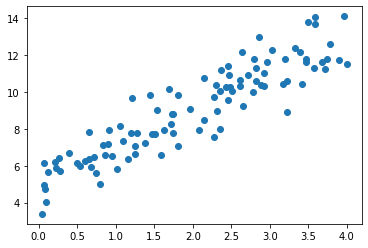

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

w0 = 5
w1 = 2
noise = np.random.randn(100,1) #표준 정규분포를 따르는 데이터 100개 생성 코드

x = 4 * np.random.rand(100,1) #0~4 사이 실수값을 100개 생성
y = w1 * x + w0 + noise

plt.scatter(x,y)

모델 훈련

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print('y절편(w0) :', linear_reg_model.intercept_)
print('회귀계수(w1) :', linear_reg_model.coef_)

y절편(w0) : [5.09772262]
회귀계수(w1) : [[1.9808382]]


회귀선 확인

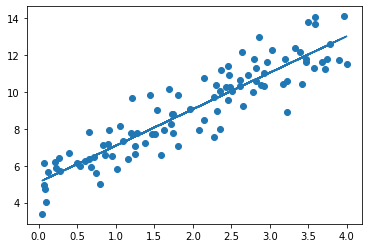

In [9]:
y_pred = linear_reg_model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred)

결정 트리

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()
#훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                    stratify = cancer_data['target'],
                                                    test_size = 0.4, random_state = 42)

decisiontree = DecisionTreeClassifier(random_state = 42) #모델 정의
decisiontree.fit(X_train, y_train) #모델 훈련

accuracy = decisiontree.score(X_test, y_test) # 정확도 측정

#테스트 데이터를 활용하여 결정 트리 모델 정확도 출력
print(f'결정 트리 정확도 : {accuracy:.3f}')

결정 트리 정확도 : 0.930


랜덤 포레스트

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#유방암 데이터셋 불러오기
cancer_data = load_breast_cancer()
#훈련, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'],
                                                    stratify = cancer_data['target'],
                                                    test_size = 0.4, random_state = 42)
randomforest = RandomForestClassifier(random_state = 42) #모델 정의
randomforest.fit(X_train, y_train)  #모델 훈련
accuracy = randomforest.score(X_test, y_test) #정확도 측정

#테스트 데이터를 활용하여 랜덤 포레스트 모델 정확도 출력
print(f'랜덤 포레스트 정확도: {accuracy :.3f}')

랜덤 포레스트 정확도: 0.939


최적화

- 베이지안 최적화

하이퍼파라미터 탐색 범위 설정

In [12]:
#하이퍼파라미터 범위(딕셔너리 형태)
param_bounds = {'x' : (-1, 5),
                'y' : (0,4)}

평가지표 계산 함수 정의

In [13]:
def eval_function(x,y):
  return -x**2 - (y-2)**2 + 10

베이지안 최적화 객체 생성

In [20]:
# !pip install bayes_opt
# !pip install Bayesian-Optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement bayes_opt (from versions: none)
ERROR: No matching distribution found for bayes_opt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

최적화 수행

In [22]:
#베이지안 최적화 수행
optimizer.maximize(init_points = 2, n_iter = 10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.596     | 2.171     | 2.832     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.467     | 0.3522    | 1.361     |
| 7         | 7.39      | -1.0      | 3.269     |
| 8         | 5.0       | -1.0      | 0.0       |
| 9         | 3.841     | 1.469     | 0.0       |
| 10        | 8.966     | -1.0      | 1.817     |
| 11        | 9.737     | 0.1806    | 2.48      |
| 12        | 5.785     | 0.4638    | 4.0       |


총 스텝 수는 12회 중간중간 평가 함수 점수가 최댓값을 갱신함. - 마지막 값이 베이지안 최적화로 찾은 최적 하이퍼파라미터임.

In [23]:
optimizer.max

{'target': 9.73708754050397,
 'params': {'x': 0.18063747442587866, 'y': 2.4798776535004214}}